# Portfolio Analysis

Adapted from LastAncientOne's Github repository [Stock_Analysis_For_Quant](https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Portfolio_Analysis.ipynb)

In [1]:
import datetime
from jupyrest_example import load_data_from_object, Portfolio

In [2]:
# default parameters
portfolio = Portfolio(
    start_date = datetime.date.fromisoformat("2022-04-26"),
    end_date = datetime.date.fromisoformat("2023-04-26"),
    holdings={'AAPL': 0.25,'MSFT': 0.25,'AMD': 0.25,'NVDA': 0.25}
)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset, weights = load_data_from_object(portfolio)
dataset

,AAPL,MSFT,AMD,NVDA
Date,,,,
2022-04-26,156.80,270.22,85.16,187.88
2022-04-27,156.57,283.22,84.91,184.15
2022-04-28,163.64,289.63,89.64,197.82
2022-04-29,157.65,277.52,85.52,185.47
2022-05-02,157.96,284.47,89.84,195.33
...,...,...,...,...
2023-04-19,167.63,288.45,89.94,279.31
2023-04-20,166.65,286.11,90.11,271.04
2023-04-21,165.02,285.76,88.43,271.19


In [5]:
# Calculate Daily Returns
returns = dataset.pct_change()

In [6]:
returns = returns.dropna()

In [7]:
returns.head()

,AAPL,MSFT,AMD,NVDA
Date,,,,
2022-04-27,-0.001467,0.048109,-0.002936,-0.019853
2022-04-28,0.045156,0.022633,0.055706,0.074233
2022-04-29,-0.036605,-0.041812,-0.045962,-0.062430
2022-05-02,0.001966,0.025043,0.050514,0.053162
2022-05-03,0.009623,-0.009456,0.014359,0.003532


In [8]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

AAPL    0.000405
MSFT    0.000307
AMD     0.000570
NVDA    0.002034
dtype: float64


In [9]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

AAPL    0.021563
MSFT    0.021558
AMD     0.035765
NVDA    0.037515
dtype: float64


In [10]:
# Define weights for the portfolio
weights = np.array(weights)

In [11]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          AAPL      MSFT       AMD      NVDA
AAPL  0.116244  0.091300  0.131643  0.144041
MSFT  0.091300  0.116186  0.135134  0.147391
AMD   0.131643  0.135134  0.319776  0.294329
NVDA  0.144041  0.147391  0.294329  0.351846


In [12]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [13]:
# Print the portfolio return
print(portReturn)

0.0008292530478624063


In [14]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [15]:
returns.head()

,AAPL,MSFT,AMD,NVDA,Portfolio
Date,,,,,
2022-04-27,-0.001467,0.048109,-0.002936,-0.019853,0.005963
2022-04-28,0.045156,0.022633,0.055706,0.074233,0.049432
2022-04-29,-0.036605,-0.041812,-0.045962,-0.062430,-0.046702
2022-05-02,0.001966,0.025043,0.050514,0.053162,0.032672
2022-05-03,0.009623,-0.009456,0.014359,0.003532,0.004514


In [16]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                AAPL      MSFT       AMD      NVDA  Portfolio
Date                                                         
2023-04-19  1.069069  1.067464  1.056130  1.486640   1.186590
2023-04-20  1.062819  1.058804  1.058126  1.442623   1.174227
2023-04-21  1.052423  1.057509  1.038398  1.443421   1.165686
2023-04-24  1.054401  1.042743  1.028300  1.439323   1.158502
2023-04-25  1.044452  1.019244  0.984030  1.396689   1.128195


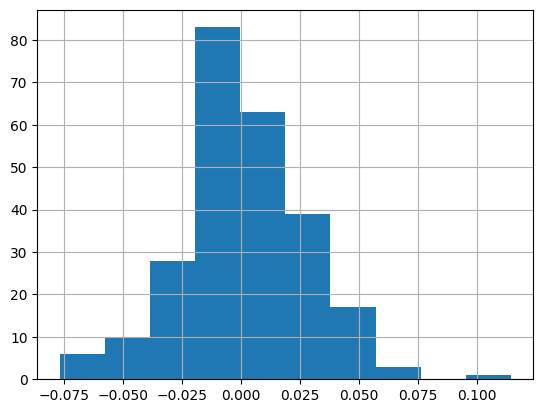

In [17]:
returns['Portfolio'].hist()
plt.show()

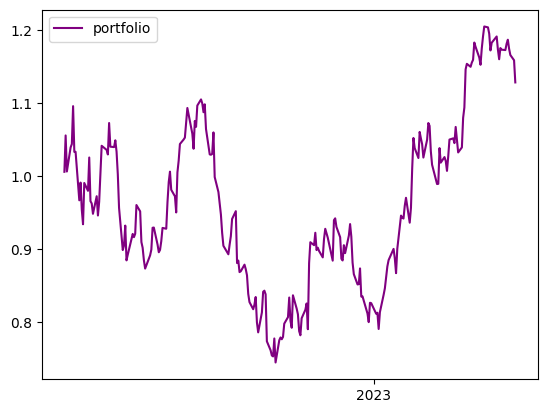

In [18]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [19]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.08292530478624063
Std. dev:  2.6418408848122703
skew:  0.17285369394033132
kurt:  1.1565880506198751


In [20]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

41.77%


In [21]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

17.45%


In [22]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 1 year 
annualized_return = ((total_return + 1.0)**(1/1))-1.0

In [23]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [24]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print (sharpe_ratio)

-12.920287988892264


If the analysis results in a negative Sharpe ratio, it either means the risk-free rate is greater than the portfolio's return, or the portfolio's return is expected to be negative. 

In [25]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.08292530478624063
--------------------------------------------------
Downside risk:
AAPL         1.634153
MSFT         1.461869
AMD          2.329831
NVDA         2.487101
Portfolio    1.604180
dtype: float64
--------------------------------------------------
Sortino ratio:
AAPL        -0.561193
MSFT        -0.627330
AMD         -0.393623
NVDA        -0.368732
Portfolio   -0.571678
dtype: float64


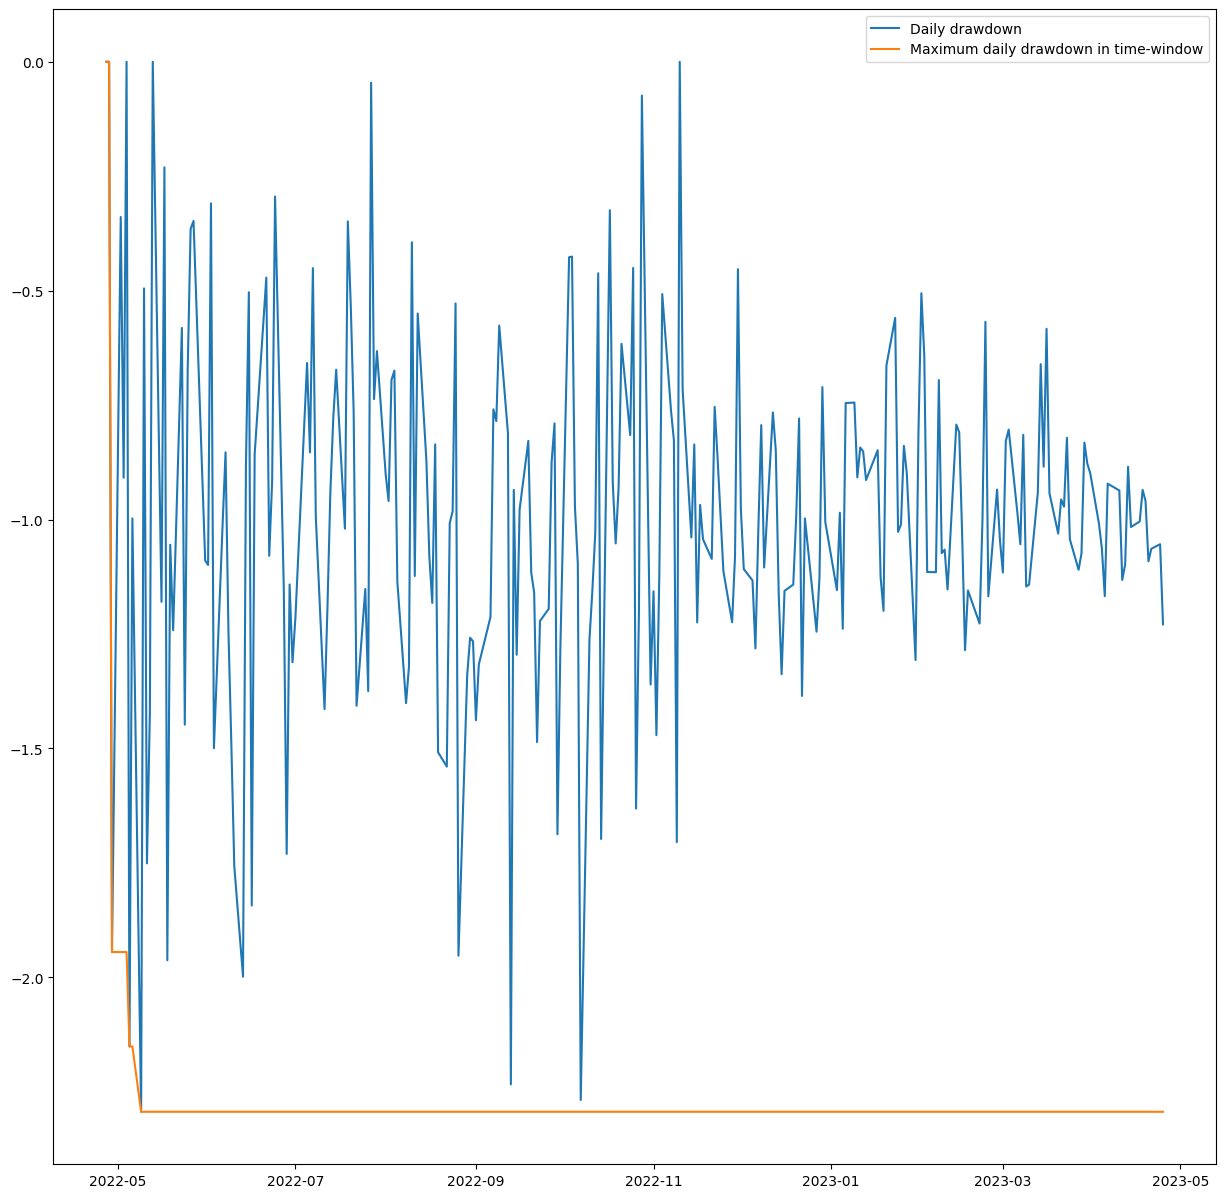

In [26]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

In [27]:
output_df = pd.concat({"DownsideRisk":down_stdev*100, "SortinoRatio": sortino_ratio}, axis=1)
output_df

,DownsideRisk,SortinoRatio
AAPL,1.634153,-0.561193
MSFT,1.461869,-0.627330
AMD,2.329831,-0.393623
NVDA,2.487101,-0.368732
Portfolio,1.604180,-0.571678


In [28]:
import json
from jupyrest import save_output

save_output(output_df.to_dict())